In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

df_train = pd.read_csv('/data_fae_uq/clavicle_ct/annotations_train.csv')
df_val = pd.read_csv('/data_fae_uq/clavicle_ct/annotations_val.csv')
df_test = pd.read_csv('/data_fae_uq/clavicle_ct/annotations_test.csv')

for df in [df_train, df_val, df_test]:
    df['age_years'] = df['age'] / 365.25

df_all = pd.concat([df_train, df_val, df_test])
genders = sorted(list(df_all.sex.unique()))
df_all[['age', 'age_years', 'sex']]

,age,age_years,sex
0,10242,28.041068,M
1,8868,24.279261,F
2,6684,18.299795,M
3,7060,19.329227,F
4,7060,19.329227,F
...,...,...,...
295,5826,15.950719,M
296,6856,18.770705,M
297,10042,27.493498,M
298,10595,29.007529,F


## Unbalanced Raw (Full) Dataset

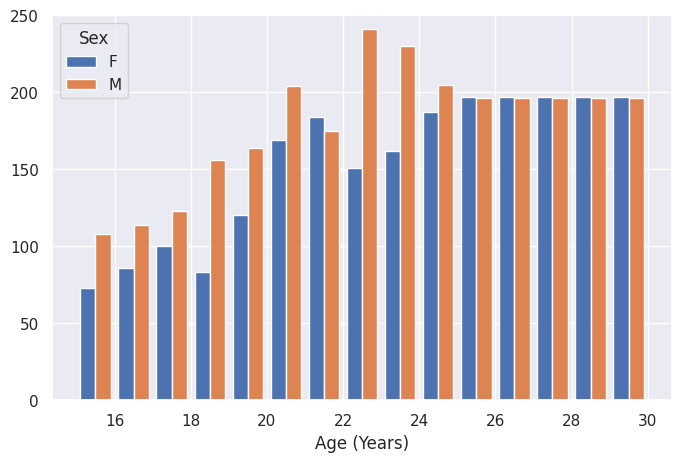

In [2]:
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(
    [df_all.loc[df_all.sex == x, 'age_years'] for x in genders],
    label=genders,
    bins=15,
)
ax.set_xlabel('Age (Years)')
ax.set_ylim(top=250)
ax.legend(title='Sex', loc='upper left')
fig.show()

## Unbalanced Train Dataset

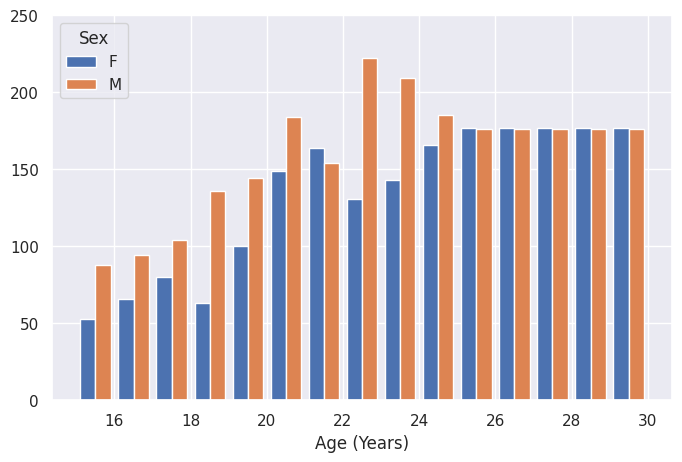

In [3]:
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(
    [df_train.loc[df_train.sex == x, 'age_years'] for x in genders],
    label=genders,
    bins=15,
)
ax.set_xlabel('Age (Years)')
ax.set_ylim(top=250)
ax.legend(title='Sex', loc='upper left')
fig.show()

## Rebalanced Train Dataset

New Data Size: 5280 Old Size: 4400


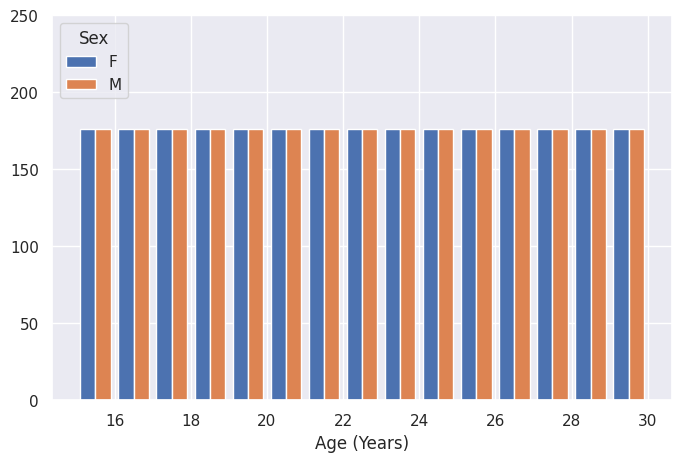

In [4]:
df_train_balanced = df_train.copy(deep=True)

# 15 Bins: [15, 30]
age_bins = np.linspace(start=15.0, stop=30.0, num=16, endpoint=True, dtype=np.int32)
df_train_balanced["age_bin"] = np.digitize(df_train_balanced["age_years"].to_numpy(), age_bins)

# Identify number of samples to be drawn per bin, i.e. per age and sex
_, counts = np.unique(df_train_balanced["age_bin"].to_numpy(), return_counts=True)
n_samples_per_bin = int(np.max(counts) / 2.0)

# Sample Bin-Wise
df_train_balanced = df_train_balanced.groupby(
    ["age_bin", "sex"]
).apply(
    lambda x: x.sample(n_samples_per_bin, replace=True)
).reset_index(drop=True)
print('New Data Size:', df_train_balanced.shape[0], 'Old Size:', df_train.shape[0])

fig, ax = plt.subplots(figsize=(8,5))
ax.hist(
    [df_train_balanced.loc[df_train_balanced.sex == x, 'age_years'] for x in genders],
    label=genders,
    bins=age_bins,
)
ax.set_xlabel('Age (Years)')
ax.set_ylim(top=250)
ax.legend(title='Sex', loc='upper left')
fig.show()